### Problem Statement

    Identify products at risk of backorder before the event occurs so that business has time to react.

### What is a Backorder?
    Backorders are products that are temporarily out of stock, but a customer is permitted to place an order against future inventory. A backorder generally indicates that customer demand for a product or service exceeds a company’s capacity to supply it. Back orders are both good and bad. Strong demand can drive back orders, but so can suboptimal planning.

### Data

Data file contains the historical data for the 8 weeks prior to the week we are trying to predict. The data was taken as weekly snapshots at the start of each week. Columns are defined as follows:

    sku - Random ID for the product

    national_inv - Current inventory level for the part

    lead_time - Transit time for product (if available)

    in_transit_qty - Amount of product in transit from source

    forecast_3_month - Forecast sales for the next 3 months

    forecast_6_month - Forecast sales for the next 6 months

    forecast_9_month - Forecast sales for the next 9 months

    sales_1_month - Sales quantity for the prior 1 month time period

    sales_3_month - Sales quantity for the prior 3 month time period

    sales_6_month - Sales quantity for the prior 6 month time period

    sales_9_month - Sales quantity for the prior 9 month time period

    min_bank - Minimum recommend amount to stock

    potential_issue - Source issue for part identified

    pieces_past_due - Parts overdue from source

    perf_6_month_avg - Source performance for prior 6 month period

    perf_12_month_avg - Source performance for prior 12 month period

    local_bo_qty - Amount of stock orders overdue

    deck_risk - Part risk flag

    oe_constraint - Part risk flag

    ppap_risk - Part risk flag

    stop_auto_buy - Part risk flag

    rev_stop - Part risk flag

    went_on_backorder - Product actually went on backorder. This is the target value.

#### Identify Right Error Metrics

    Based on the business, identify right error metrics.

In [2]:
import pandas as pd
import numpy as np

In [3]:
#Recall/TPR

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df_back_orders=pd.read_csv("BackOrders.csv")

In [6]:
df_back_orders.shape

(61589, 23)

In [7]:
df_back_orders.isnull().sum()

sku                     0
national_inv            0
lead_time            3403
in_transit_qty          0
forecast_3_month        0
forecast_6_month        0
forecast_9_month        0
sales_1_month           0
sales_3_month           0
sales_6_month           0
sales_9_month           0
min_bank                0
potential_issue         0
pieces_past_due         0
perf_6_month_avg        0
perf_12_month_avg       0
local_bo_qty            0
deck_risk               0
oe_constraint           0
ppap_risk               0
stop_auto_buy           0
rev_stop                0
went_on_backorder       0
dtype: int64

In [8]:
df_back_orders.head(2)

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1888279,117,NaN,0,0,0,0,0,0,15,...,0,-99.0,-99.00,0,No,No,Yes,Yes,No,No
1,1870557,7,2.0,0,0,0,0,0,0,0,...,0,0.5,0.28,0,Yes,No,No,Yes,No,No


In [17]:
df.dtypes

national_inv           int64
lead_time            float64
in_transit_qty         int64
forecast_3_month       int64
forecast_6_month       int64
forecast_9_month       int64
sales_1_month          int64
sales_3_month          int64
sales_6_month          int64
sales_9_month          int64
min_bank               int64
potential_issue       object
pieces_past_due        int64
perf_6_month_avg     float64
perf_12_month_avg    float64
local_bo_qty           int64
deck_risk             object
oe_constraint         object
ppap_risk             object
stop_auto_buy         object
rev_stop              object
went_on_backorder     object
dtype: object

In [12]:
df=df_back_orders

In [13]:
df.columns

Index(['sku', 'national_inv', 'lead_time', 'in_transit_qty',
       'forecast_3_month', 'forecast_6_month', 'forecast_9_month',
       'sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month',
       'min_bank', 'potential_issue', 'pieces_past_due', 'perf_6_month_avg',
       'perf_12_month_avg', 'local_bo_qty', 'deck_risk', 'oe_constraint',
       'ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder'],
      dtype='object')

## Preprocessing Data (Drop NA, Change Dtypes)

In [14]:
df.drop('sku',axis=1,inplace=True)

In [18]:
cat_cols=['potential_issue','deck_risk','oe_constraint','ppap_risk','stop_auto_buy','rev_stop','went_on_backorder']
df[cat_cols]=df[cat_cols].astype('category')

In [25]:
df.dtypes

national_inv               int64
lead_time                float64
in_transit_qty             int64
forecast_3_month           int64
forecast_6_month           int64
forecast_9_month           int64
sales_1_month              int64
sales_3_month              int64
sales_6_month              int64
sales_9_month              int64
min_bank                   int64
pieces_past_due            int64
perf_6_month_avg         float64
perf_12_month_avg        float64
local_bo_qty               int64
potential_issue_Yes        uint8
deck_risk_Yes              uint8
oe_constraint_Yes          uint8
ppap_risk_Yes              uint8
stop_auto_buy_Yes          uint8
rev_stop_Yes               uint8
went_on_backorder_Yes      uint8
dtype: object

In [20]:
df=df.dropna()

In [23]:
df.isnull().sum()

national_inv             0
lead_time                0
in_transit_qty           0
forecast_3_month         0
forecast_6_month         0
forecast_9_month         0
sales_1_month            0
sales_3_month            0
sales_6_month            0
sales_9_month            0
min_bank                 0
pieces_past_due          0
perf_6_month_avg         0
perf_12_month_avg        0
local_bo_qty             0
potential_issue_Yes      0
deck_risk_Yes            0
oe_constraint_Yes        0
ppap_risk_Yes            0
stop_auto_buy_Yes        0
rev_stop_Yes             0
went_on_backorder_Yes    0
dtype: int64

In [22]:
df=pd.get_dummies(df,drop_first=True)

In [24]:
df.columns

Index(['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month',
       'forecast_6_month', 'forecast_9_month', 'sales_1_month',
       'sales_3_month', 'sales_6_month', 'sales_9_month', 'min_bank',
       'pieces_past_due', 'perf_6_month_avg', 'perf_12_month_avg',
       'local_bo_qty', 'potential_issue_Yes', 'deck_risk_Yes',
       'oe_constraint_Yes', 'ppap_risk_Yes', 'stop_auto_buy_Yes',
       'rev_stop_Yes', 'went_on_backorder_Yes'],
      dtype='object')

In [26]:
X=df.drop('went_on_backorder_Yes',axis=1)

In [27]:
y=df['went_on_backorder_Yes']

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=4)

In [29]:
X_train.shape

(40730, 21)

## Perceptron Model

In [33]:
from keras.models import Sequential 
from keras.layers import Dense
import warnings
warnings.filterwarnings("ignore")
from keras import initializers
model1=Sequential()
model1.add(Dense(12,input_dim=21,activation="sigmoid",kernel_initializer=initializers.RandomUniform(seed=4567)))
model1.add(Dense(1,activation='sigmoid', kernel_initializer=initializers.RandomUniform(seed=4587)))

In [34]:
### Compile the model

In [35]:
model1.compile(loss='binary_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [38]:
model1_history=model1.fit(X_train,y_train,epochs=10,batch_size=64,validation_split=0.2)

Instructions for updating:
Use tf.cast instead.
Train on 32584 samples, validate on 8146 samples
Epoch 1/10
32584/32584 [==============================] - 2s 65us/step - loss: 0.4257 - accuracy: 0.8097 - val_loss: 0.3610 - val_accuracy: 0.8122
Epoch 2/10
32584/32584 [==============================] - 1s 39us/step - loss: 0.3448 - accuracy: 0.8168 - val_loss: 0.3405 - val_accuracy: 0.8122
Epoch 3/10
32584/32584 [==============================] - 1s 41us/step - loss: 0.3266 - accuracy: 0.8229 - val_loss: 0.3058 - val_accuracy: 0.8580
Epoch 4/10
32584/32584 [==============================] - 1s 38us/step - loss: 0.3004 - accuracy: 0.8639 - val_loss: 0.2904 - val_accuracy: 0.8815
Epoch 5/10
32584/32584 [==============================] - 1s 32us/step - loss: 0.2974 - accuracy: 0.8670 - val_loss: 0.2906 - val_accuracy: 0.8731
Epoch 6/10
32584/32584 [==============================] - 1s 33us/step - loss: 0.2953 - accuracy: 0.8607 - val_loss: 0.2746 - val_accuracy: 0.8869
Epoch 7/10
32584/3258

In [39]:
## Plot

In [42]:
print(model1_history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


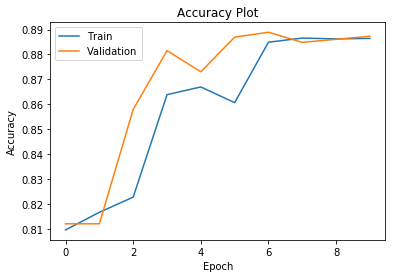

In [43]:
plt.plot(model1_history.history['accuracy'])
plt.plot(model1_history.history['val_accuracy'])
plt.title('Accuracy Plot')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'])
plt.show()

In [44]:
### Plot for loss function

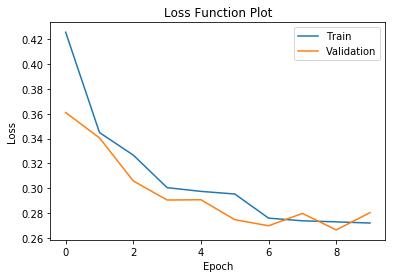

In [47]:
plt.plot(model1_history.history['loss'])
plt.plot(model1_history.history['val_loss'])
plt.title('Loss Function Plot')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'])
plt.show()

In [48]:
### Predictions

In [49]:
from sklearn.metrics import confusion_matrix

In [50]:
test_pred=model1.predict_classes(X_test)
train_pred=model1.predict_classes(X_train)

conf_test=confusion_matrix(y_test,test_pred)
conf_train=confusion_matrix(y_train,train_pred)

In [51]:
print(conf_test)
print(conf_train)

[[13572   610]
 [ 1377  1897]]
[[31643  1392]
 [ 3216  4479]]


In [52]:
type(test_pred)

numpy.ndarray

In [60]:
confusion_matrix_train=conf_train
confusion_matrix_test=conf_test

In [61]:
Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
TNR_Train= confusion_matrix_train[0,0]/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1])
TPR_Train= confusion_matrix_train[1,1]/(confusion_matrix_train[1,0]+confusion_matrix_train[1,1])

print("Train TNR: ",TNR_Train)
print("Train TPR: ",TPR_Train)
print("Train Accuracy: ",Accuracy_Train)

print("-----------------------")

Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
TNR_Test= confusion_matrix_test[0,0]/(confusion_matrix_test[0,0] +confusion_matrix_test[0,1])
TPR_Test= confusion_matrix_test[1,1]/(confusion_matrix_test[1,0] +confusion_matrix_test[1,1])

print("Test TNR: ",TNR_Test)
print("Test TPR: ",TPR_Test)
print("Test Accuracy: ",Accuracy_Test)

Train TNR:  0.9578628727107613
Train TPR:  0.582066276803119
Train Accuracy:  0.8868647188804322
-----------------------
Test TNR:  0.9569877309265266
Test TPR:  0.5794135613927917
Test Accuracy:  0.8861709440879927


In [62]:
type(test_pred)

numpy.ndarray

In [66]:
test_proba=model1.predict_proba(X_test)

In [67]:
type(test_proba)

numpy.ndarray

In [69]:
test_proba

array([[0.42059916],
       [0.6320642 ],
       [0.0210968 ],
       ...,
       [0.4238097 ],
       [0.04737717],
       [0.6324919 ]], dtype=float32)

In [70]:
from sklearn.metrics import roc_auc_score, roc_curve, f1_score, recall_score, classification_report, precision_score


In [71]:
fpr, tpr, threshold = roc_curve(y_test, test_proba, pos_label = 1)


In [72]:
print("AUC Score {:.3f}\n".format(roc_auc_score(y_test, test_proba)))

AUC Score 0.919



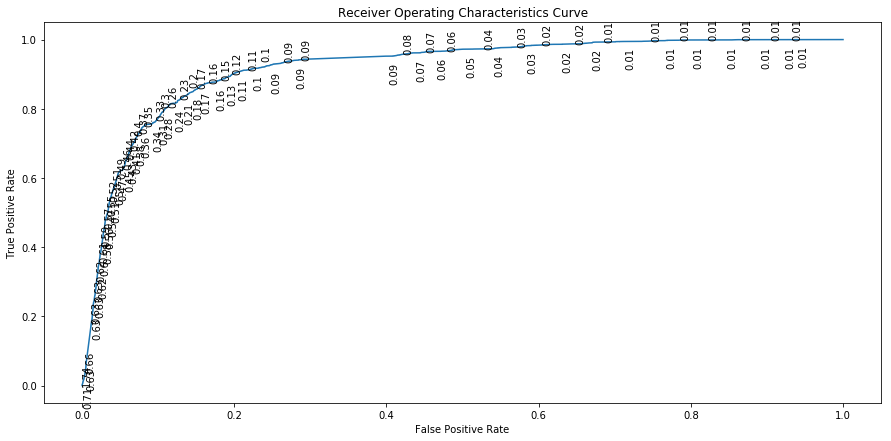

In [74]:
plt.figure(figsize=(15,7))
lineplot = sns.lineplot(x = fpr, y = tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristics Curve")
for i in range(0, len(threshold)):
    if i % 40 == 0:
        lineplot.text(fpr[i], tpr[i] + 0.04 * (-1)**(i/40), round(threshold[i], 2), rotation = 90)
plt.show()


In [78]:
# Make predictions based on a threshold
Threshold = 0.26
test_pred = [1 if i > Threshold else 0 for i in test_proba]

# Evaluate the predictions
f1_LR = f1_score(y_test, test_pred)
recall_LR = recall_score(y_test, test_pred)
precision_LR = precision_score(y_test, test_pred)

LR_metrics = {'f1-Score':f1_LR, 'Recall':recall_LR, 'Precision':precision_LR}
#print(np.round(LR_metrics, 2))
print("\nPerformance of LR Classifier is as follows:\n\n{}".format(classification_report(y_test, test_pred)))


Performance of LR Classifier is as follows:

              precision    recall  f1-score   support

           0       0.95      0.89      0.92     14182
           1       0.62      0.81      0.70      3274

   micro avg       0.87      0.87      0.87     17456
   macro avg       0.79      0.85      0.81     17456
weighted avg       0.89      0.87      0.88     17456

